In [ ]:
# 1.)
# A perceptron is a neural network that has an input of linear neurons and outputs a sin(x) based function

In [ ]:
# 2.)
# The basic perceptron is just has on input and one output, where the multilayer perceptron
# has another output after the original as a second layer making a deep learning model.

In [ ]:
# 3.)
# A hard-margin is reffering to fitting a model to have zero errors making it different from
# soft-margins which allow for some error.

In [ ]:
# 4.)
# A

In [ ]:
# 5.)
# D

In [4]:
pip install tensorflow

SyntaxError: invalid syntax (2357089093.py, line 1)

In [2]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.svm import SVR

import tensorflow as tf

s3 = boto3.resource('s3')
bucket_name = 'data-445-timlincoln'
bucket = s3.Bucket(bucket_name)

file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
heart = pd.read_csv(file_content_stream)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Dropping N/A variables
heart = heart.dropna()

In [4]:
# Defining the input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Scaling data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
# Defining the 1st model
md1 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
      tf.keras.layers.Dense(2, activation = 'softmax')
])

md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2),
        epochs = 100, batch_size = 500, validation_data = (X_test, 
                                                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)))

2022-10-28 17:47:28.781629: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-28 17:47:28.781696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-167-1.ec2.internal): /proc/driver/nvidia/version does not exist
2022-10-28 17:47:28.782638: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 0.5574 - accuracy: 0.8386 - val_loss: 0.5604 - val_accuracy: 0.8743
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.8386 - val_loss: 0.5423 - val_accuracy: 0.8784
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5318 - accuracy: 0.8389 - val_loss: 0.5265 - val_accuracy: 0.8770
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5219 - accuracy: 0.8389 - val_loss: 0.5128 - val_accuracy: 0.8811
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5135 - accuracy: 0.8389 - val_loss: 0.5009 - val_accuracy: 0.8811
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5064 - accuracy: 0.8389 - val_loss: 0.4905 - val_accuracy: 0.8811
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5004 - accuracy: 0.8389 - val_loss: 0.4815 - val_accuracy: 0.8811
Epoch 8/100
6/6 [=========

In [6]:
# Predicting on test
md1_pred = md1.predict(X_test)[:, 1]

# Changing likelihoods to labels
md1_labels = np.where(md1_pred < 0.15, 0, 1)

# Computing recall score
md1_recall = recall_score(Y_test, md1_labels)
print('The recall of the 1st model is:', md1_recall)

The recall of the 1st model is: 0.8953488372093024


In [7]:
# Defining the 2nd model
md2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
      tf.keras.layers.Dense(2, activation = 'softmax')
])

md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2),
        epochs = 100, batch_size = 500, validation_data = (X_test, 
                                                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)))

Epoch 1/100
6/6 [==============================] - 0s 25ms/step - loss: 0.7699 - accuracy: 0.1611 - val_loss: 0.7643 - val_accuracy: 0.1175
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7427 - accuracy: 0.1611 - val_loss: 0.7356 - val_accuracy: 0.1216
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7184 - accuracy: 0.1960 - val_loss: 0.7098 - val_accuracy: 0.2514
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.4473 - val_loss: 0.6864 - val_accuracy: 0.6434
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.7794 - val_loss: 0.6652 - val_accuracy: 0.8538
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.8369 - val_loss: 0.6460 - val_accuracy: 0.8798
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.8393 - val_loss: 0.6285 - val_accuracy: 0.8825
Epoch 8/100
6/6 [=========

In [8]:
# Predicting on test
md2_pred = md2.predict(X_test)[:, 1]

# Changing likelihoods to labels
md2_labels = np.where(md2_pred < 0.15, 0, 1)

# Computing recall score
md2_recall = recall_score(Y_test, md2_labels)
print('The recall of the 2nd model is:', md2_recall)

The recall of the 2nd model is: 1.0


In [9]:
# Defining 3rd model
md3 = SVR(kernel = 'rbf').fit(X_train, Y_train)

# Predicting on test
md3_pred = md3.predict(X_test)

# Changing likelihoods to labels
md3_labels = np.where(md3_pred < 0.15, 0, 1)

# Computing recall score
md3_recall = recall_score(Y_test, md3_labels)
print('The recall of the 3rd model is:', md3_recall)

The recall of the 3rd model is: 0.0


In [10]:
# Defining 4th model
md4 = SVR(kernel = 'poly').fit(X_train, Y_train)

# Predicting on test
md4_pred = md4.predict(X_test)

# Changing likelihoods to labels
md4_labels = np.where(md4_pred < 0.15, 0, 1)

# Computing recall score
md4_recall = recall_score(Y_test, md4_labels)
print('The recall of the 4th model is:', md4_recall)

The recall of the 4th model is: 0.0


In [13]:
# Creating lists for models
md1_list = []
md2_list = []
md3_list = []
md4_list = []

# Creating loop 
for n in range(0, 100):
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    # Scaling data
    scaler = MinMaxScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # -----------------------------
    
    # Defining the 1st model
    md1 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
      tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2),
        epochs = 100, batch_size = 500, validation_data = (X_test, 
                                                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)))
    
    # Predicting on test
    md1_pred = md1.predict(X_test)[:, 1]

    # Changing likelihoods to labels
    md1_labels = np.where(md1_pred < 0.15, 0, 1)

    # Computing recall score
    md1_recall = recall_score(Y_test, md1_labels)
    
    # Appending results
    md1_list.append(md1_recall)
    
    # ----------------------
    
    # Defining the 2nd model
    md2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
      tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2),
        epochs = 100, batch_size = 500, validation_data = (X_test, 
                                                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)))

    # Predicting on test
    md2_pred = md2.predict(X_test)[:, 1]

    # Changing likelihoods to labels
    md2_labels = np.where(md2_pred < 0.15, 0, 1)

    # Computing recall score
    md2_recall = recall_score(Y_test, md2_labels)
    
    # Appending results
    md2_list.append(md2_recall)
    
    # ----------------------
    
    # Defining 3rd model
    md3 = SVR(kernel = 'rbf').fit(X_train, Y_train)

    # Predicting on test
    md3_pred = md3.predict(X_test)

    # Changing likelihoods to labels
    md3_labels = np.where(md3_pred < 0.15, 0, 1)

    # Computing recall score
    md3_recall = recall_score(Y_test, md3_labels)
    
    # Appending results
    md3_list.append(md3_recall)
    
    # ----------------------
    
    # Defining 4th model
    md4 = SVR(kernel = 'poly').fit(X_train, Y_train)

    # Predicting on test
    md4_pred = md4.predict(X_test)

    # Changing likelihoods to labels
    md4_labels = np.where(md4_pred < 0.15, 0, 1)

    # Computing recall score
    md4_recall = recall_score(Y_test, md4_labels)
    
    # Appending results
    md4_list.append(md4_recall)

Epoch 1/100
6/6 [==============================] - 0s 32ms/step - loss: 0.6770 - accuracy: 0.5619 - val_loss: 0.6684 - val_accuracy: 0.5779
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.6375 - val_loss: 0.6368 - val_accuracy: 0.6489
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6186 - accuracy: 0.7062 - val_loss: 0.6098 - val_accuracy: 0.7199
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.7698 - val_loss: 0.5865 - val_accuracy: 0.7842
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5759 - accuracy: 0.8105 - val_loss: 0.5664 - val_accuracy: 0.8251
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.8280 - val_loss: 0.5490 - val_accuracy: 0.8388
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5443 - accuracy: 0.8386 - val_loss: 0.5338 - val_accuracy: 0.8497
Epoch 8/100
6/6 [=========

AttributeError: 'list' object has no attribute 'mean'

In [16]:
# Defining average function
def call_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t
        
    avg = sum_num / len(num)
    return avg

# Calling average function
print('Average recall for model 1 is:', call_average(md1_list))
print('Average recall for model 2 is:', call_average(md2_list))
print('Average recall for model 3 is:', call_average(md3_list))
print('Average recall for model 4 is:', call_average(md4_list))

Average recall for model 1 is: 0.47817462828918345
Average recall for model 2 is: 0.6534771468529721
Average recall for model 3 is: 0.031631059477358316
Average recall for model 4 is: 0.0


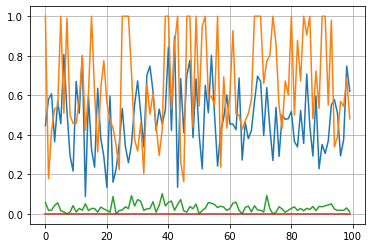

In [17]:
# Creating visualization of recall score
plt.plot(md1_list)
plt.plot(md2_list)
plt.plot(md3_list)
plt.plot(md4_list)
plt.grid()
plt.show()

In [ ]:
# From the results of the iterations, the best preforming model is number 2 with an average recall of 0.6535.